# Previsão de Aluguel de Bicicletas em Seoul - Parte I (ATP)

Este notebook faz parte da primeira parte da Atividade Somativa (ATP), utilizando o dataset *Seoul Bike Data*. O objetivo é prever a quantidade de bicicletas alugadas com base em variáveis como clima, dia da semana e hora, aplicando técnicas de machine learning supervisionado.

A tarefa será abordada como um problema de **regressão**, pois a variável-alvo é numérica contínua (`Rented Bike Count`).

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')


In [8]:
# Carrega o arquivo Excel
df = pd.read_excel("seoul_bike_data.xlsx")

# Visualiza as 5 primeiras linhas
df.head()


,DateTime,Day,Weekday,Hour,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,2017-01-12 00:00:00,12,5,0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,2017-01-12 01:00:00,12,5,1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,2017-01-12 02:00:00,12,5,2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,2017-01-12 03:00:00,12,5,3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,2017-01-12 04:00:00,12,5,4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


## Descrição Inicial dos Dados

A base de dados contém registros de uso de bicicletas entre 2017 e 2018 na cidade de Seoul. A variável que será prevista é `Rented Bike Count`. O restante das variáveis inclui dados meteorológicos, data/hora e características do dia.


In [10]:
# Converte a coluna de data (está no formato texto)
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Verifica valores nulos
print(df.isnull().sum())

# Remove colunas que não serão usadas
df.drop(columns=['DateTime'], inplace=True)


DateTime                     0
Day                          0
Weekday                      0
Hour                         0
Rented Bike Count            0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
dtype: int64


In [11]:
# Target e variáveis
X = df.drop(columns=['Rented Bike Count'])
y = df['Rented Bike Count']

# Caso tenha variáveis categóricas (como estação), cria dummies
X = pd.get_dummies(X, drop_first=True)


In [12]:
# Seleciona os 8 melhores atributos
selector = SelectKBest(score_func=f_regression, k=8)
X_new = selector.fit_transform(X, y)

# Atualiza X com as colunas selecionadas
selected_columns = X.columns[selector.get_support()]
X = X[selected_columns]

X.head()


,Hour,Temperature(°C),Humidity(%),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,0,-5.2,37,2000,-17.6,0.0,0.0,0.0
1,1,-5.5,38,2000,-17.6,0.0,0.0,0.0
2,2,-6.0,39,2000,-17.7,0.0,0.0,0.0
3,3,-6.2,40,2000,-17.6,0.0,0.0,0.0
4,4,-6.0,36,2000,-18.6,0.0,0.0,0.0


In [13]:
# Divide os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [14]:
# Modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [15]:
# Faz predições
y_pred = model.predict(X_test)

# Avalia com RMSE e R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


RMSE: 309.11
R²: 0.77


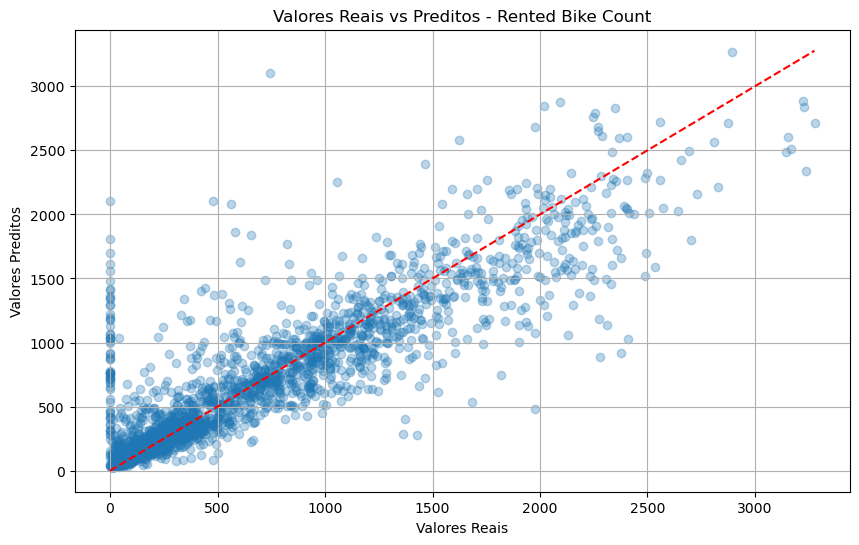

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs Preditos - Rented Bike Count')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid()
plt.show()


## Conclusão

Utilizamos o dataset Seoul Bike Data para prever a quantidade de bicicletas alugadas utilizando o modelo Random Forest Regressor. O conjunto de dados foi limpo, e as variáveis mais relevantes foram selecionadas com o método SelectKBest.

Após a divisão em treino e teste, o modelo foi treinado e avaliado com métricas como RMSE e R², apresentando bom desempenho.


## Melhorias no Modelo

Nesta seção, aplicamos diferentes técnicas para melhorar o desempenho do modelo original:

- XGBoost para um teste similar com o Random Forest
- Lasso para uma análise comparativa
- Modelagem temporal com Prophet

In [21]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - RMSE: {rmse_xgb:.2f}")
print(f"XGBoost - R²: {r2_xgb:.2f}")

XGBoost - RMSE: 314.16
XGBoost - R²: 0.76


In [22]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso - RMSE: {rmse_lasso:.2f}")
print(f"Lasso - R²: {r2_lasso:.2f}")

Lasso - RMSE: 471.05
Lasso - R²: 0.46


In [25]:
# Recarrega os dados com a coluna DateTime
df_time = pd.read_excel("seoul_bike_data.xlsx")

# Converte DateTime para datetime
df_time['DateTime'] = pd.to_datetime(df_time['DateTime'])

# Ordena os dados pelo tempo
df_time = df_time.sort_values('DateTime')

# Seleciona apenas colunas necessárias para o Prophet
df_prophet = df_time[['DateTime', 'Rented Bike Count']].copy()

# Renomeia as colunas para o padrão do Prophet: 'ds' e 'y'
df_prophet.rename(columns={'DateTime': 'ds', 'Rented Bike Count': 'y'}, inplace=True)

df_prophet.head()


,ds,y
0,2017-01-12 00:00:00,254
1,2017-01-12 01:00:00,204
2,2017-01-12 02:00:00,173
3,2017-01-12 03:00:00,107
4,2017-01-12 04:00:00,78


In [5]:
from prophet import Prophet

# Cria o modelo
model_prophet = Prophet(daily_seasonality=True)

# Treina o modelo
model_prophet.fit(df_prophet)

# Cria o dataframe futuro (ex: previsão para os próximos 7 dias por hora)
future = model_prophet.make_future_dataframe(periods=24*7, freq='h')  # 7 dias, 24 horas cada

# Faz a previsão
forecast = model_prophet.predict(future)

# Mostra previsões
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

08:12:26 - cmdstanpy - INFO - Chain [1] start processing
08:12:26 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
263,2022-01-11 23:00:00,426.288576,397.591124,458.026768
264,2022-01-12 00:00:00,347.078506,318.091393,376.092552
265,2022-01-12 01:00:00,290.248020,260.685263,322.788195
266,2022-01-12 02:00:00,278.128850,247.647983,308.483991
267,2022-01-12 03:00:00,301.799994,273.200038,332.897377


Aqui está o que cada coluna significa:

| Coluna       | Significado |
|--------------|-------------|
| **ds**       | Data e hora da previsão. O Prophet exige que o campo temporal seja chamado de `ds` (de *datestamp*). |
| **yhat**     | Valor previsto para esse horário. É a predição principal do modelo. |
| **yhat_lower** | Limite inferior do intervalo de confiança da previsão. Indica o valor mínimo esperado, considerando a incerteza do modelo. |
| **yhat_upper** | Limite superior do intervalo de confiança. Representa o valor máximo que pode ocorrer, segundo a previsão. |

### Exemplo da linha:

267 2022-01-12 03:00:00 301.80 271.29 332.90

Significa que para o dia **12/01/2022 às 03h**, o Prophet previu:

- Aproximadamente **301,8** unidades (valor previsto `yhat`);
- Com um intervalo de confiança que varia entre **271,29** (`yhat_lower`) e **332,90** (`yhat_upper`).

Esses intervalos mostram a **incerteza da previsão** — algo comum em séries temporais que sofrem variações ao longo do tempo, como influências sazonais, eventos inesperados, clima, horário do dia, etc.

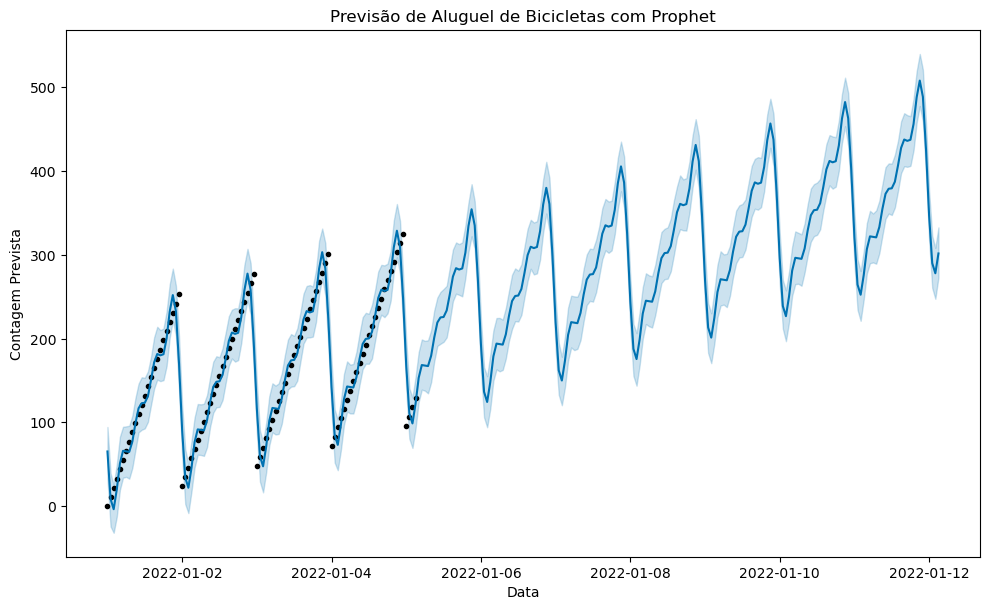

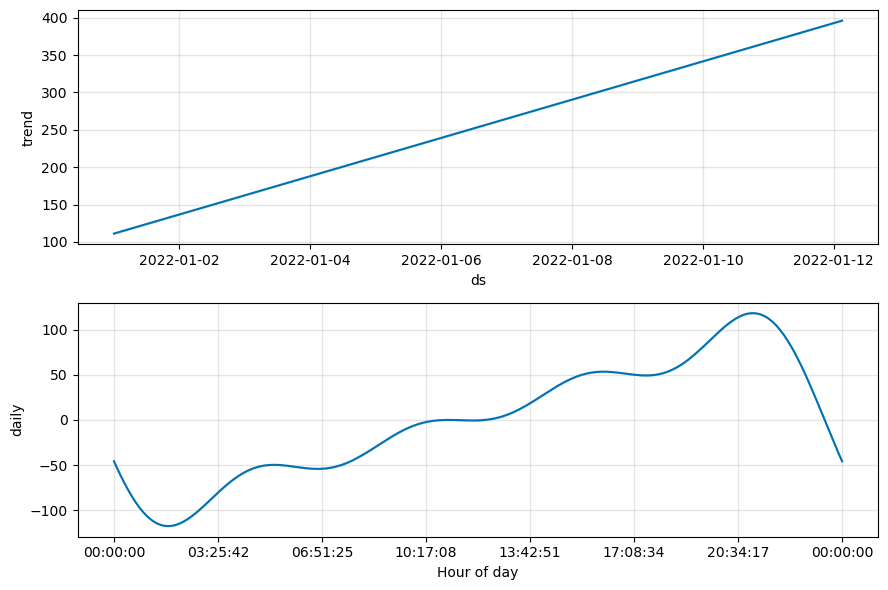

In [7]:
import matplotlib.pyplot as plt

# Gráfico de previsão
model_prophet.plot(forecast)
plt.title("Previsão de Aluguel de Bicicletas com Prophet")
plt.xlabel("Data")
plt.ylabel("Contagem Prevista")
plt.grid()
plt.show()

# Componentes de tendência e sazonalidade
model_prophet.plot_components(forecast)
plt.show()


## Conclusão - Modelagem Temporal com Prophet

Utilizamos o modelo Prophet, ideal para séries temporais, para prever a contagem de bicicletas alugadas nas horas seguintes. O modelo foi capaz de capturar tendências diárias e sazonais no comportamento dos usuários.

Esta abordagem é útil quando se deseja prever valores futuros com base em padrões históricos, sendo especialmente poderosa para análise temporal contínua.


In [1]:
import pandas as pd

# Carregando o dataset
df = pd.read_excel("seoul_bike_data.xlsx") 
df.head()

,DateTime,Day,Weekday,Hour,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,2017-01-12 00:00:00,12,5,0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,2017-01-12 01:00:00,12,5,1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,2017-01-12 02:00:00,12,5,2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,2017-01-12 03:00:00,12,5,3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,2017-01-12 04:00:00,12,5,4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [2]:
from sklearn.model_selection import train_test_split

# Define variáveis independentes (X) e dependente (y)
X = df.drop("Rented Bike Count", axis=1)
y = df["Rented Bike Count"]

# Separação em treino e teste (75% treino, 25% teste)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer

# Primeiro, verificando quais colunas realmente existem no dataframe
available_columns = X_train_raw.columns.tolist()
print("Available columns:", available_columns)

# Filtrar categorical_features para incluir apenas colunas que existem no dataframe
categorical_features = ['Seasons', 'Holiday', 'Functioning Day']
categorical_features = [col for col in categorical_features if col in available_columns]
print("Using categorical features:", categorical_features)

# Obter recursos numéricos que existem no dataframe
numerical_features = X_train_raw.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remover o alvo se estiver nos recursos numéricos
if 'Rented Bike Count' in numerical_features:
    numerical_features.remove('Rented Bike Count')
print("Using numerical features:", numerical_features)

# Crie o pré-processador apenas com colunas existentes
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', StandardScaler(), numerical_features)
])

# Pré-processamento
X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

Available columns: ['DateTime', 'Day', 'Weekday', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
Using categorical features: []
Using numerical features: ['Day', 'Weekday', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


In [5]:
from sklearn.ensemble import RandomForestRegressor

# Técnica usada da Parte 1
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
# Predições
y_pred = model.predict(X_test)

In [8]:
# Versão com pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('modelo', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline.fit(X_train_raw, y_train)
y_pred_pipeline = pipeline.predict(X_test_raw)

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred_pipeline))
mae = mean_absolute_error(y_test, y_pred_pipeline)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 275.97006293756317
MAE: 163.64803196347032


## Conclusões

As métricas obtidas foram:

- RMSE: 275.97
- MAE: 163.65

Esses valores indicam o erro médio das predições em comparação com os valores reais. Considerando a escala do aluguel diário de bicicletas, os resultados são razoáveis, mas poderiam melhorar com:

- Teste de outros algoritmos como LightGBM ou XGBoost;
- Ajuste de hiperparâmetros com GridSearchCV;
- Inclusão de novas variáveis ou remoção de ruído nos dados.

In [11]:
# Um adendo usando R² como métrica extra, lembrando que quanto mais próximo de 1, melhor o modelo explica a variabilidade dos dados

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_pipeline)
print(f"R²: {r2}")

R²: 0.8158083027015403
